In [396]:
using Random, Distributions, Plots

In [397]:
mutable struct Individual
    chromosome::Float64
    lifespan::Int
end
function normal_dist(x, m, v)
    return 1/(v*sqrt(2*π))*exp(-(x-m)^2/(2*v^2))
end

function objective_function(x)
    return 5-24*x+17*x^2-11/3*x^3+1/4*x^4
end
function cross_entropy_method(objective_function, max_iter=5,start_mean = 7, start_std=1.0,t=5, sample_size=5, elite_fraction=0.1)
    # Инициализация начального распределения
    vmean = start_mean
    vstd_dev = start_std
    g_best_value = Inf
    g_best_sample = randn() * vstd_dev + vmean
    g_samples = []
    hist = []
    hist_mean = []
    hist_elite = []
    for iter in 1:max_iter
        for i in 1:length(g_samples)
            g_samples[i].lifespan -= 1
        end
        g_samples = filter(x -> x.lifespan != 0, g_samples)
        g_samples = [g_samples; [Individual(randn() * vstd_dev + vmean, t) for _ in 1:sample_size]]
        values = [objective_function(sample.chromosome) for sample in g_samples]
        elite_samples = g_samples[sortperm(values)[1:floor(Int, sample_size * elite_fraction)]]
        push!(hist_mean, vmean)
        push!(hist_elite, [[sample.chromosome, sample.lifespan] for sample in g_samples])
        vmean = mean([sample.chromosome for sample in elite_samples])
        #vstd_dev = std([sample.chromosome for sample in elite_samples])
        best_value = minimum(values)
        best_sample = g_samples[argmin(values)].chromosome
        if g_best_value > best_value
            g_best_value = best_value
            g_best_sample = best_sample
        end
        push!(hist, best_sample)

        println("Iteration $iter: Best value = $best_value,")
    end

    return g_best_sample, hist, hist_mean, hist_elite
end
start_std = 1.5
start_mean = 7
T = 5
g_best_sample, hist, hist_mean, hist_elite = cross_entropy_method(objective_function, 10,start_mean, start_std, T, 20)


Iteration 1: Best value = 5.000017533253185,
Iteration 2: Best value = 5.000017533253185,
Iteration 3: Best value = 2.438140218024847,
Iteration 4: Best value = -4.69147695249873,
Iteration 5: Best value = -4.774580915262228,
Iteration 6: Best value = -5.313639344284585,
Iteration 7: Best value = -5.405230898698001,
Iteration 8: Best value = -5.416659318605296,
Iteration 9: Best value = -5.416659318605296,
Iteration 10: Best value = -5.416659318605296,


(0.9990103551847069, Any[6.001871787818567, 6.001871787818567, 2.3397591796776256, 0.7045827620648462, 0.7212382917634553, 0.8851417541154978, 1.0393231379065264, 0.9990103551847069, 0.9990103551847069, 0.9990103551847069], Any[7, 6.238749781933418, 5.961381259351182, 4.170815483748097, 1.5221709708712359, 1.0226712442282473, 1.0560344051337591, 0.9622324460110121, 1.0191667465456167, 1.0191667465456167], Any[[[5.241310058119281, 5.0], [7.458808847685422, 5.0], [6.001871787818567, 5.0], [6.678980438741823, 5.0], [7.503836649759116, 5.0], [7.804083056365761, 5.0], [6.731986366311322, 5.0], [7.330714370820392, 5.0], [8.250998875726253, 5.0], [7.180757469272105, 5.0], [6.686577174533672, 5.0], [7.442934751889885, 5.0], [7.008980959351264, 5.0], [7.385168998407874, 5.0], [7.202858361645441, 5.0], [6.475627776048269, 5.0], [7.105483321968512, 5.0], [3.5487338862787743, 5.0], [7.666105191584455, 5.0], [7.727365422894573, 5.0]], [[5.241310058119281, 4.0], [7.458808847685422, 4.0], [6.00187178

[ Info: Saved animation to /home/andrey/work/Optimization/lab14/anim_fps15.gif


Plots.AnimatedGif("/home/andrey/work/Optimization/lab14/anim_fps15.gif")
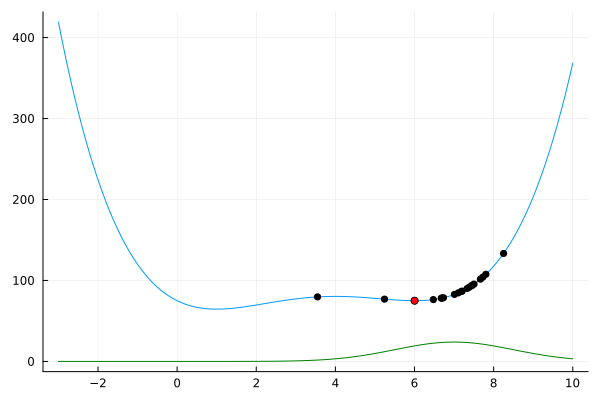

In [398]:
up = 70
x_min, x_max = -3, 10
anim = @animate for i in 1:length(hist)
    plot([x for x ∈ x_min:0.1:x_max], [objective_function(x)+up for x ∈ x_min:0.1:x_max])
    for h ∈ hist_elite[i]
        value = abs(h[2]-T)/T
        scatter!([h[1]], [objective_function(h[1])+up], color=RGB(value, value, value), legend=false)
    end
    scatter!([hist[i]], [objective_function(hist[i])+up], color=:red)
    plot!([x for x ∈ x_min:0.1:x_max], [90*normal_dist(x, hist_mean[i], start_std) for x ∈ x_min:0.1:x_max], color=:green)
end
gif(anim, "anim_fps15.gif", fps = 2)

In [399]:
# plot([i for i ∈ 0:0.1:10], [objective_function(i) for i ∈ 0:0.1:10])
# scatter!([h for h ∈ hist], [objective_function(h) for h ∈ hist])
# scatter!([hist[end]], [objective_function(hist[end])])